## Plastic stress intensity ratio

For an infinitely wide, center-cracked panel we use (2.1)
$$K_I = \sigma \sqrt{\pi a}$$

In plane strain, the plastic stress intensity factor, $K_{Ie}$ is given by
$$K_{Ie} = \sigma \sqrt{\pi(a+r_p)}$$
where (in plane stress)
$$r_p = \frac{1}{2\pi} \left( \frac{K_{Ie}}{\sigma_{YS}}\right)^2$$

Substituting $r_p$ into $K_{Ie}$ gives
$$K_{Ie} = \sigma \sqrt{\pi \left(a+\frac{1}{2\pi} \left( \frac{K_{Ie}}{\sigma_{YS}}\right)^2\right)}$$

We square both sides to find
$$K_{Ie}^2 = \sigma^2 \pi \left(a+\frac{1}{2\pi} \left( \frac{K_{Ie}}{\sigma_{YS}}\right)^2\right)$$
Multiplying out we get
$$K_{Ie}^2 = \sigma^2 \pi a+\frac{\sigma^2}{2} \left( \frac{K_{Ie}}{\sigma_{YS}}\right)^2$$
We can subtract the second term from both sides
$$K_{Ie}^2 - \frac{\sigma^2}{2} \left( \frac{K_{Ie}}{\sigma_{YS}}\right)^2 = \sigma^2 \pi a$$
And simplify
$$K_{Ie}^2\left(1 - \frac{\sigma^2}{2 \sigma_{YS}^2}\right) = \sigma^2 \pi a$$

We can now divide both sides by $\left(1 - \frac{\sigma^2}{2 \sigma_{YS}^2}\right)$ to find
$$K_{Ie}^2 = \frac{\sigma^2 \pi a}{1 - \frac{\sigma^2}{2 \sigma_{YS}^2}}$$
We take the square root of both sides
$$K_{Ie} = \frac{\sigma \sqrt{\pi a}}{\sqrt{1 - \frac{\sigma^2}{2 \sigma_{YS}^2}}}$$
We can now replace $\sigma \sqrt{\pi a}$ with $K_I$
$$K_{Ie} = \frac{K_I}{\sqrt{1 - \frac{\sigma^2}{2 \sigma_{YS}^2}}}$$
And divide both sides by $K_I$
$$\frac{K_{Ie}}{K_I} = \frac{1}{\sqrt{1 - \frac{\sigma^2}{2 \sigma_{YS}^2}}}$$

Now we are ready to generate a plot. Fracture mechanics is only valid when $\sigma < \sigma_{YS}$, so we consider $0<\sigma<\sigma_{YS}$ for the plot.

C:\Miniconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


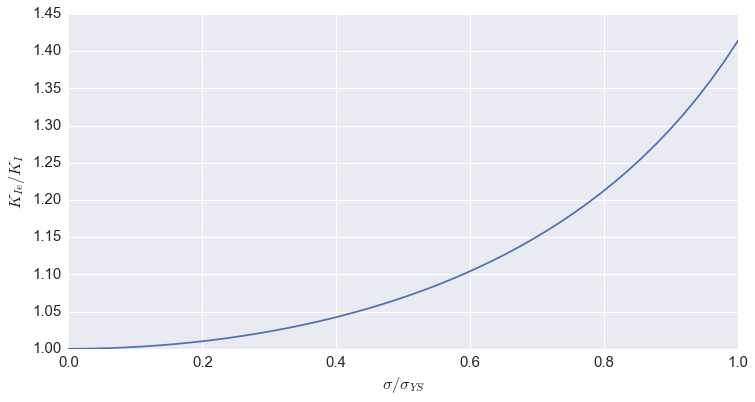

In [1]:
import numpy as np

s_sys = np.linspace(0,1)
KIe_KI = 1./(1.-s_sys**2/2.)**.5

import matplotlib.pyplot as plt
import seaborn as sb
sb.set(font_scale=1.5)
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(s_sys,KIe_KI)
plt.xlabel(r'$\sigma / \sigma_{YS}$')
plt.ylabel(r'$K_{Ie} / K_I$')

## Numerical plastic stress intensity ratio

We can consider the numerical effect for situations that do not come out as cleanly as the case of an infinitely wide center-cracked panel. Consider an edge-cracked panel with $W=5"$, an applied stress of 8 ksi and varying crack length. We assume the material has $\sigma_{YS} = 50 \text{ ksi}$ and that the panel is in plane stress.

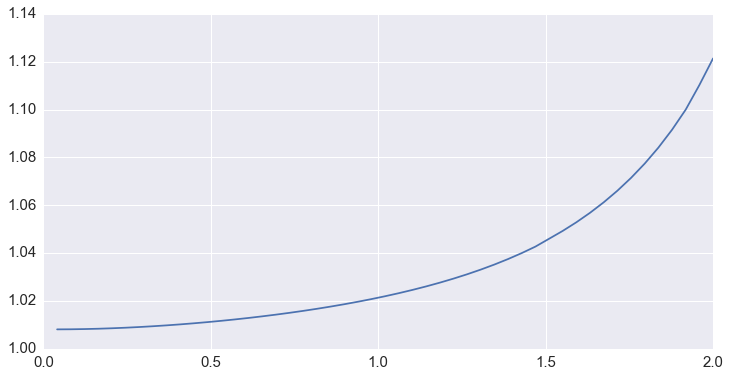

In [6]:
w = 5
a = np.linspace(0,w/2)
def beta(a,w):
    return 1.122 - 0.231*a/w + 10.55*(a/w)**2 - 21.71*(a/w)**3 + 30.82*(a/w)**4
def KI(a,w,s):
    return s*np.sqrt(np.pi*a)*beta(a,w)
def KIe(a,w,s,sy,I):
    KI_old = KI(a,w,s)
    rp = 1.0/(I*np.pi)*(KI(a,w,s)/sy)**2
    aeff = a + rp
    KI_new = KI(aeff,w,s)
    while ((KI_old-KI_new)/KI_old)**2 > 0.00001:
        rp = 1.0/(I*np.pi)*(KI(aeff,w,s)/sy)**2
        aeff = a + rp
        KI_old = KI_new
        KI_new = KI(aeff,w,s)
    return KI_new
s = 8 #ksi
sy = 50 #ksi
I = 2 #plane stress
K_Ie = np.zeros(len(a))
for i in range(len(a)):
    K_Ie[i] = KIe(a[i],w,s,sy,I)
plt.figure(figsize=(12,6))
plt.plot(a,K_Ie/KI(a,w,s))